# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

##Observations
- Based on the observable trends below, we can see how the temperature changes depending on the latitude. As the latitude gets closer to zero the temperature rises. This is confirmed by the high correlation coefficient.
- While temperature has a strong correlation, humidity, cloudiness, and wind speed do not. This is evidenced by thier very low corrlation coefficients. 
- Lastly, I found it interesting that most cities have high humidity. I thought there would be a greater variation here, similar to that of cloudiness. 

In [123]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [124]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


642

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [125]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=d5437e1e573bf2f48e94c4dfe481d5ea&units=imperial&q='

In [126]:
# set up lists to hold reponse info
lat = []
lon = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
city_date = []
city_name = []
record_count = 0

#Loop through cities to build full URL for each city
for city in cities:
    record_count = record_count + 1
    print(f"Processing record {record_count} | {city}")
    #print(query_url+city)
    #pprint(response)
    try:
        response = requests.get(query_url + city).json() 
        time.sleep(1)
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        city_date.append(response['dt'])
        city_name.append(response['name'])
       
    except:
        print("city not found")
        pass
    
    

Processing record 1 | lompoc
Processing record 2 | ushuaia
Processing record 3 | albany
Processing record 4 | cape town
Processing record 5 | seguela
Processing record 6 | suntar
Processing record 7 | georgetown
Processing record 8 | dudinka
Processing record 9 | gibara
Processing record 10 | avarua
Processing record 11 | chaoyang
Processing record 12 | teya
Processing record 13 | vanimo
Processing record 14 | nanortalik
Processing record 15 | hilo
Processing record 16 | sorong
Processing record 17 | bayir
Processing record 18 | lebu
Processing record 19 | teguise
Processing record 20 | rikitea
Processing record 21 | punta arenas
Processing record 22 | pimenta bueno
Processing record 23 | clyde river
Processing record 24 | nara
Processing record 25 | sorvag
city not found
Processing record 26 | new norfolk
Processing record 27 | lazaro cardenas
Processing record 28 | isangel
Processing record 29 | beringovskiy
Processing record 30 | kaeo
Processing record 31 | el jicaro
Processing reco

Processing record 241 | porto novo
Processing record 242 | playas
Processing record 243 | lake havasu city
Processing record 244 | olenino
Processing record 245 | vardo
Processing record 246 | vila velha
Processing record 247 | presidente epitacio
Processing record 248 | namatanai
Processing record 249 | emerald
Processing record 250 | saleaula
city not found
Processing record 251 | novyy buh
Processing record 252 | pingdingshan
Processing record 253 | elmina
Processing record 254 | price
Processing record 255 | lumphat
Processing record 256 | skiros
city not found
Processing record 257 | vila
Processing record 258 | darhan
Processing record 259 | elizabeth city
Processing record 260 | hasaki
Processing record 261 | te anau
Processing record 262 | bo rai
Processing record 263 | chuy
Processing record 264 | boralday
Processing record 265 | ponta delgada
Processing record 266 | tumannyy
city not found
Processing record 267 | key west
Processing record 268 | simbahan
Processing record 269

Processing record 479 | phangnga
Processing record 480 | puerto colombia
Processing record 481 | fonte boa
Processing record 482 | makakilo city
Processing record 483 | baruun-urt
Processing record 484 | san pedro
Processing record 485 | san patricio
Processing record 486 | okato
Processing record 487 | ostrovnoy
Processing record 488 | olafsvik
Processing record 489 | baculin
Processing record 490 | abiy adi
city not found
Processing record 491 | pedernales
Processing record 492 | bathsheba
Processing record 493 | el retorno
Processing record 494 | lata
Processing record 495 | samana
Processing record 496 | monforte de lemos
Processing record 497 | kilindoni
Processing record 498 | khorramshahr
Processing record 499 | wenling
Processing record 500 | geraldton
Processing record 501 | krasnyy chikoy
Processing record 502 | antofagasta
Processing record 503 | esperance
Processing record 504 | general pico
Processing record 505 | humberto de campos
Processing record 506 | miraflores
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [127]:
weather_dic = {"City": city_name, 
               "Latitude": lat,
              "Temperature": temp,
              "Humidity": humidity,
              "Cloudiness": cloudiness, 
              "Wind Speed": wind_speed, 
              "Country": country, 
              "City Date": city_date}

weather_data = pd.DataFrame(weather_dic)
weather_data.head(10)

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,City Date
0,Lompoc,34.6391,66.11,78,20,10.36,US,1635626839
1,Ushuaia,-54.8000,51.46,50,0,19.57,AR,1635627213
2,Albany,42.6001,56.12,89,91,6.44,US,1635627139
3,Cape Town,-33.9258,61.61,79,0,1.01,ZA,1635627222
4,Séguéla,7.9611,75.43,79,95,2.80,CI,1635627430
5,Suntar,62.1444,26.64,86,100,8.43,RU,1635627431
6,George Town,5.4112,77.34,93,20,1.99,MY,1635626849
7,Dudinka,69.4058,11.16,96,100,4.14,RU,1635627434
8,Gibara,21.1097,84.81,67,97,3.47,CU,1635627436
9,Avarua,-21.2078,75.25,60,20,13.80,CK,1635627249


In [150]:

#save as CSV
weather_data.to_csv("cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [129]:
#  Get the indices of cities that have humidity over 100%.
high_humidity = weather_data.loc[weather_data["Humidity"] >= 100]
high_humidity.head()

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,City Date
22,Clyde River,70.4692,28.63,100,90,23.02,CA,1635627455
45,Ust-Maya,60.4167,-6.83,100,63,0.87,RU,1635627162
59,Tuktoyaktuk,69.4541,17.60,100,75,10.36,CA,1635627270
117,Bilibino,68.0546,-9.42,100,100,1.57,RU,1635627063
141,Khatanga,71.9667,-6.50,100,73,2.19,RU,1635627373


In [130]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_weather_data = weather_data.drop(weather_data.index[weather_data['Humidity'] == 100], inplace=False)
clean_weather_data

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,City Date
0,Lompoc,34.6391,66.11,78,20,10.36,US,1635626839
1,Ushuaia,-54.8000,51.46,50,0,19.57,AR,1635627213
2,Albany,42.6001,56.12,89,91,6.44,US,1635627139
3,Cape Town,-33.9258,61.61,79,0,1.01,ZA,1635627222
4,Séguéla,7.9611,75.43,79,95,2.80,CI,1635627430
...,...,...,...,...,...,...,...,...
589,Aktash,50.3000,20.64,73,100,3.71,RU,1635628220
590,Concepción,-36.8270,64.20,63,0,11.50,CL,1635628275
591,Samarai,-10.6167,82.72,79,99,13.67,PG,1635628276
592,Archidona,37.0965,61.00,83,99,5.55,ES,1635628277


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

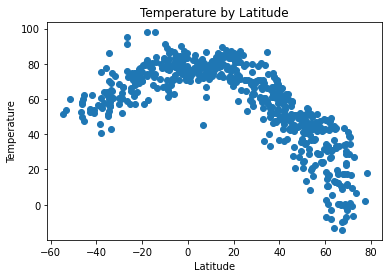

In [156]:
#Create Scatter plots
x_axis = lat
y_axis = temp
plt.scatter(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Temperature by Latitude")
plt.savefig("../output_data/fig1.png")
plt.show()

There is a very clear relationship between temperature and latitude. The closer to the equator, the higher the temperature. 

## Latitude vs. Humidity Plot

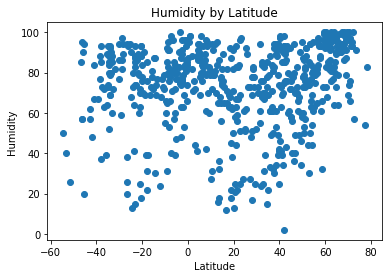

In [157]:
x_axis = lat
y_axis = humidity
plt.scatter(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity by Latitude")
plt.savefig("../output_data/fig2.png")
plt.show()

There is a no clear relationship between humidity and latitude.  The data isn't trending in any directions.

## Latitude vs. Cloudiness Plot

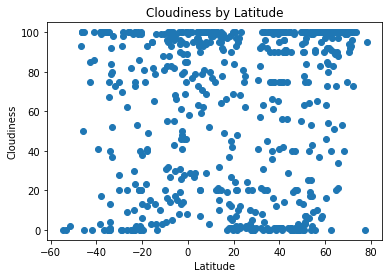

In [158]:
x_axis = lat
y_axis = cloudiness
plt.scatter(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness by Latitude")
plt.savefig("../output_data/fig3.png")
plt.show()

There is no clear relationship between cloudiness and latitide. The data is fairly evenly distributed both near to and far from the equator. 

## Latitude vs. Wind Speed Plot

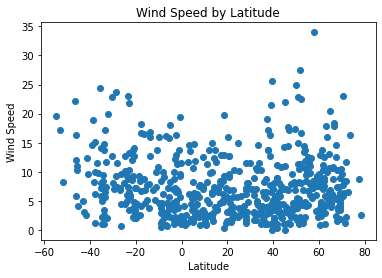

In [159]:
x_axis = lat
y_axis = wind_speed
plt.scatter(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed by Latitude")
plt.savefig("../output_data/fig4.png")
plt.show()

Again, there is no clear relationship between wind speed and latitude as the data doesnst trend one way or another. 

## Linear Regression

In [135]:
#create new lists to store northern and southern hemishere data
nh_lat = weather_data.loc[weather_data['Latitude'] >=0, ['Latitude']]
sh_lat = weather_data.loc[weather_data['Latitude'] <0, ['Latitude']]
#will need to add these to df if needed
# nh_lon = weather_data.loc[weather_data['Latitude'] >=0, ['Longitude']]
# sh_lon = weather_data.loc[weather_data['Latitude'] <0, ['Longitude']]
nh_temp = weather_data.loc[weather_data['Latitude'] >=0, ['Temperature']]
sh_temp = weather_data.loc[weather_data['Latitude'] <0, ['Temperature']]
nh_humidity = weather_data.loc[weather_data['Latitude'] >=0, ['Humidity']]
sh_humidity = weather_data.loc[weather_data['Latitude'] <0, ['Humidity']]
nh_cloudiness = weather_data.loc[weather_data['Latitude'] >=0, ['Cloudiness']]
sh_cloudiness = weather_data.loc[weather_data['Latitude'] <0, ['Cloudiness']]
nh_wind_speed = weather_data.loc[weather_data['Latitude'] >=0, ['Wind Speed']]
sh_wind_speed = weather_data.loc[weather_data['Latitude'] <0, ['Wind Speed']]
nh_country = weather_data.loc[weather_data['Latitude'] >=0, ['Country']]
sh_country = weather_data.loc[weather_data['Latitude'] <0, ['Country']]
nh_city_date = weather_data.loc[weather_data['Latitude'] >=0, ['City Date']]
sh_city_date = weather_data.loc[weather_data['Latitude'] <0, ['City Date']]
nh_city_name = weather_data.loc[weather_data['Latitude'] >=0, ['City']]
sh_city_name = weather_data.loc[weather_data['Latitude'] <0, ['City']]
     


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

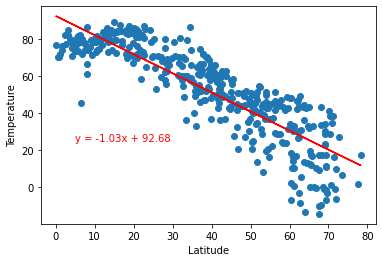

The correlation between both factors is -0.87


In [160]:
x_values = nh_lat['Latitude']
y_values = nh_temp['Temperature']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,25),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig("../output_data/fig5.png")
plt.show()

correlation = st.pearsonr(nh_lat['Latitude'],nh_temp['Temperature'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

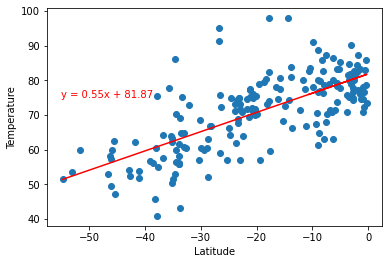

The correlation between both factors is 0.7


In [161]:
x_values = sh_lat['Latitude']
y_values = sh_temp['Temperature']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,75),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig("../output_data/fig6.png")
plt.show()

correlation = st.pearsonr(sh_lat['Latitude'],sh_temp['Temperature'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

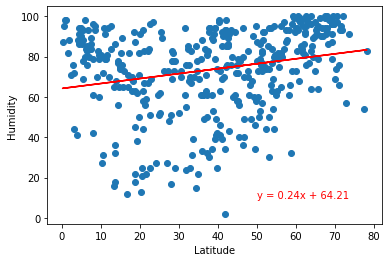

The correlation between both factors is 0.24


In [162]:
x_values = nh_lat['Latitude']
y_values = nh_humidity['Humidity']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("../output_data/fig7.png")
plt.show()

correlation = st.pearsonr(nh_lat['Latitude'],nh_humidity['Humidity'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

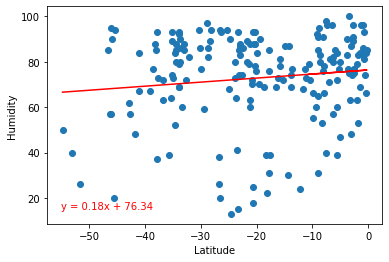

The correlation between both factors is 0.13


In [163]:
x_values = sh_lat['Latitude']
y_values = sh_humidity['Humidity']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("../output_data/fig8.png")
plt.show()

correlation = st.pearsonr(sh_lat['Latitude'],sh_humidity['Humidity'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

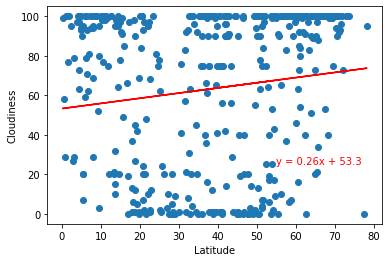

The correlation between both factors is 0.14


In [164]:
x_values = nh_lat['Latitude']
y_values = nh_cloudiness['Cloudiness']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,25),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("../output_data/fig9.png")
plt.show()

correlation = st.pearsonr(nh_lat['Latitude'],nh_cloudiness['Cloudiness'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

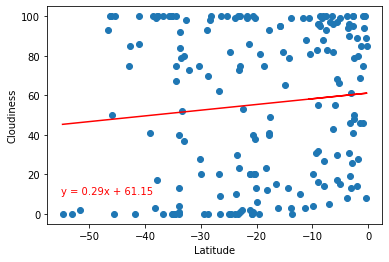

The correlation between both factors is 0.1


In [165]:
x_values = sh_lat['Latitude']
y_values = sh_cloudiness['Cloudiness']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("../output_data/fig10.png")
plt.show()

correlation = st.pearsonr(sh_lat['Latitude'],sh_cloudiness['Cloudiness'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

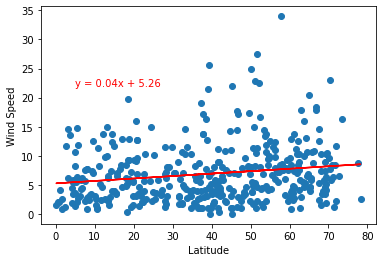

The correlation between both factors is 0.17


In [166]:
x_values = nh_lat['Latitude']
y_values = nh_wind_speed['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,22),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("../output_data/fig11.png")
plt.show()

correlation = st.pearsonr(nh_lat['Latitude'],nh_wind_speed['Wind Speed'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

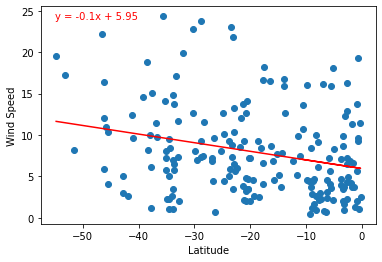

The correlation between both factors is -0.27


In [167]:
x_values = sh_lat['Latitude']
y_values = sh_wind_speed['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,24),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("../output_data/fig12.png")
plt.show()

correlation = st.pearsonr(sh_lat['Latitude'],sh_wind_speed['Wind Speed'])
print(f"The correlation between both factors is {round(correlation[0],2)}")